# Data Science Project Steps

1. Define the Research problem and questions
2. Analyze data by descriptive statistics and graphical visualization.
3. Prepare data by using relevant preprocessing transformations, data cleaning, 
    data standardization,deaing with null and outlier values.
4. Divide data into testing and training set.
5. Evaluate the first algorithm and its model performance.Create a confusion Matrix.
6. Improve model by cross validation or feature selection
7. Evaluate variety of algorithms by creating test harness for diverse
    algorithms in conjuction with resampling techniques like cross validation 
    bootstrapping.
9. Choose the best model and present the results. 

## 1. Define the Research problem and questions

**Research Questions:**  

    1.Predict Survived


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

## 2. Analyze data by descriptive statistics and graphical visualization.

In [2]:
TitanicData = pd.read_csv('train.csv')
print(TitanicData.shape)
print(TitanicData.head())
print(TitanicData.describe())
types = TitanicData.dtypes
print(types)
TitanicData.describe()


(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Prepare data by using relevant preprocessing transformations, data cleaning, data standardization,deaing with null and outlier values.
## 4. Divide data into testing and training set.
## 5. Evaluate the first algorithm and its model performance. Create a confusion Matrix.


In [3]:
TitanicData = TitanicData[['Survived', 'Pclass', 'Sex', 'SibSp','Parch','Age','Fare', 'Embarked']]
TitanicData['Sex'] = TitanicData['Sex'].replace(['male','female'],[1,0])
TitanicData['Embarked'] = TitanicData['Embarked'].replace(['S','C','Q'],[0,1,2])
TitanicData.dropna(inplace=True)

X = TitanicData[['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch']] 
y = TitanicData[['Survived']]

print(X)
print(y)

# Dividing data into two subsets training and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels.

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
# training label from a row vector to column by ravel()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)



     Pclass  Sex   Age     Fare  Embarked  SibSp  Parch
0         3    1  22.0   7.2500       0.0      1      0
1         1    0  38.0  71.2833       1.0      1      0
2         3    0  26.0   7.9250       0.0      0      0
3         1    0  35.0  53.1000       0.0      1      0
4         3    1  35.0   8.0500       0.0      0      0
..      ...  ...   ...      ...       ...    ...    ...
885       3    0  39.0  29.1250       2.0      0      5
886       2    1  27.0  13.0000       0.0      0      0
887       1    0  19.0  30.0000       0.0      0      0
889       1    1  26.0  30.0000       1.0      0      0
890       3    1  32.0   7.7500       2.0      0      0

[712 rows x 7 columns]
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
885         0
886         0
887         1
889         1
890         0

[712 rows x 1 columns]
[0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1
 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 

## 6. Improve model by cross validation or feature selection

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold = KFold(n_splits=10,random_state=7, shuffle=True)
model = GaussianNB()
results = cross_val_score(model, y_test, y_pred, cv=fold)
print(results.mean())

0.818095238095238


<AxesSubplot:>

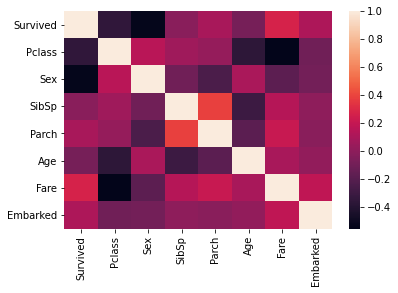

In [5]:
# Viewing Correlation coefficients using a heatmap
sns.heatmap(TitanicData.corr())

In [6]:
# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels.

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
# training label from a row vector to column by ravel()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)



[0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1
 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0]
[[75 13]
 [13 42]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        88
           1       0.76      0.76      0.76        55

    accuracy                           0.82       143
   macro avg       0.81      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143

81.81818181818183


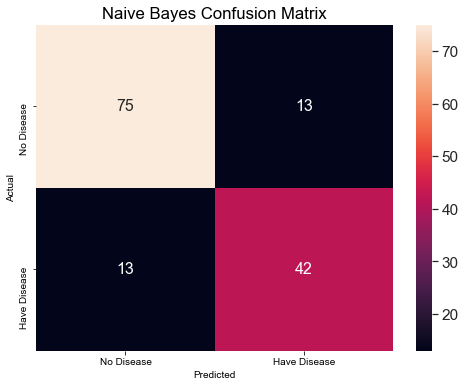

In [7]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},xticklabels=["No Disease", "Have Disease"], yticklabels=["No Disease", "Have Disease"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [8]:
# feature selection

#univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

      Specs        Score
3      Fare  4081.679420
1       Sex    74.621277
2       Age    34.246098
0    Pclass    28.243213
6     Parch    10.883500
4  Embarked     8.718472
5     SibSp     0.288691


<ipython-input-9-52defb560d77>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


[0.1151624  0.27727891 0.27014262 0.22620225 0.02695241 0.04202717
 0.04223423]


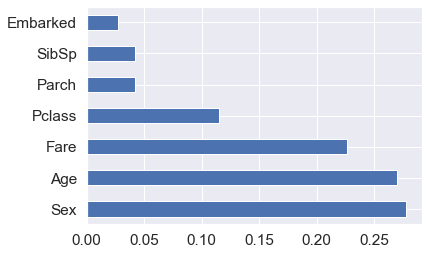

In [9]:
# feature importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [10]:
## Gather columns
# Divide data into predictor features vector and the label of the target variable 'Risk'

X = TitanicData[['Pclass','Sex','Age','Fare']] 
y = TitanicData[['Survived']]


print(X)
print(y)

# Dividing data into two subsets training and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Initiating the scikit learn instance and fit is used to train the model.The predict() function 
# implements prediction.It takes test data as an argument and returns predicted labels.

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
# training label from a row vector to column by ravel()
classifier.fit(X_train, np.ravel(y_train))
y_pred = classifier.predict(X_test)
print(y_pred)

# Step 6: we can check the performance of classifier with the help of various classification mertices like accuracy, precision, recall, f1 score etc. classification_report, confusion_matrix functions are used to calculate those metrices. For more on classification metrices and confusion matrix visit here.
#print(pred_real)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)



     Pclass  Sex   Age     Fare
0         3    1  22.0   7.2500
1         1    0  38.0  71.2833
2         3    0  26.0   7.9250
3         1    0  35.0  53.1000
4         3    1  35.0   8.0500
..      ...  ...   ...      ...
885       3    0  39.0  29.1250
886       2    1  27.0  13.0000
887       1    0  19.0  30.0000
889       1    1  26.0  30.0000
890       3    1  32.0   7.7500

[712 rows x 4 columns]
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
885         0
886         0
887         1
889         1
890         0

[712 rows x 1 columns]
[0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1]
[[73 16]
 [14 40]]
              precision    recall  f1-score   support

           0       0.84      0.82  

79.02097902097903


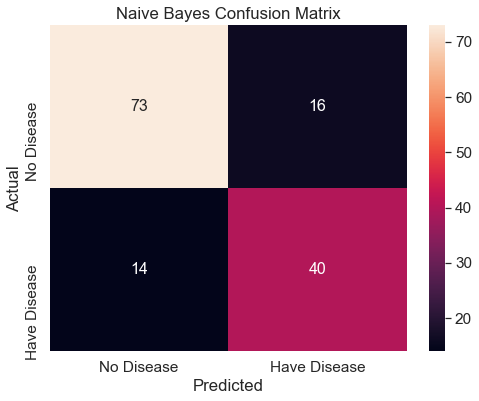

In [11]:
#model performance - accuracy
accuracy =  accuracy_score(y_test,y_pred)*100

print(accuracy)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},xticklabels=["No Disease", "Have Disease"], yticklabels=["No Disease", "Have Disease"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

## 7. Applying a new Algorithm

In [12]:

from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state = 0)
logistic_regression.fit(X_train, np.ravel(y_train))

print('Accuracy of logistic regression on training set: {:.2f}'.format(logistic_regression.score(X_train, y_train)))
print('Accuracy of logistic regression on test set: {:.2f}'.format(logistic_regression.score(X_test, y_test)))


Accuracy of logistic regression on training set: 0.79
Accuracy of logistic regression on test set: 0.80


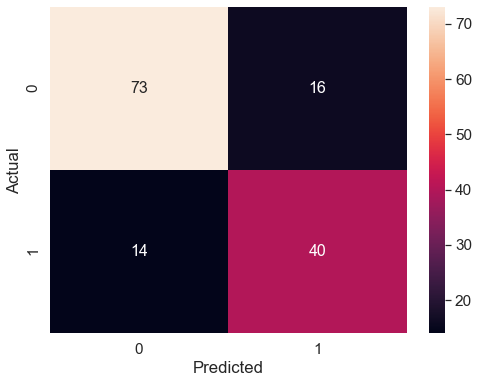

In [13]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
df_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()